## Importing the relevant packages


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [92]:
url = './ignore/S3/L11/Index2018.csv'
raw_csv_data = pd.read_csv(url) 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [93]:
df['market_value']=df.ftse

In [94]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

    1. Significant Coefficients
    2. Parsimonious (as simple as possible) 
        - generally, simpler model is better than a complex model, unless the complex model provide significantly better predctions
        - Use LLR test (information criteria, AIC/BIC)
    3. Residual should be white noise

    If we are comparing 2 models we want higher log-likelihood and lower information critera

## The ACF

Text(0, 0.5, 'ACF coefficient')

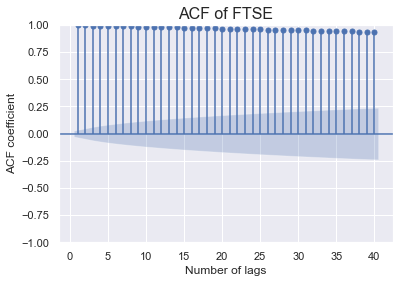

In [95]:
sgt.plot_acf(df_train['market_value'], lags=40, zero=False)
plt.title("ACF of FTSE", size=16)
plt.xlabel("Number of lags")
plt.ylabel("ACF coefficient")

## The PACF

(-0.1, 0.2)

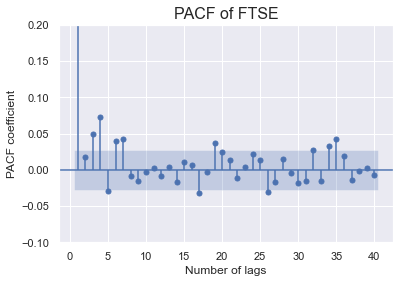

In [96]:
sgt.plot_pacf(df_train['market_value'], lags=40, method=('ols'), zero=False)
plt.title("PACF of FTSE", size=16)
plt.xlabel("Number of lags")
plt.ylabel("PACF coefficient")
plt.ylim(-0.1, 0.2)

PACF coefficients are not significant from 25th lag (actually already not significant from 8th lag), hence their impact to the model is not significant

## The AR(1) Model

    Autoregressive Model (AR): a linear model, where current period values are a sum of past outcomes multiplied by a numberic factor
    |phi| <1

In [97]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
model_ar1 = ARIMA(df_train['market_value'], order = (1,0,0)) # AR(1) model

In [99]:
results_ar1 = model_ar1.fit()

In [101]:
print(results_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Fri, 30 Dec 2022   AIC                          55251.207
Time:                        03:27:30   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6375    423.327     12.023      0.000    4259.932    5919.343
ar.L1          0.9984      0.001   1147.579      0.000       0.997       1.000
sigma2      3511.3844     40.874     85.907      0.0

    std err - How far away on average the model's predictions are from the true values
    z       - z statistic: the associated test-statistics for significance
    p-value - if less than 0.05, then can reject null hypothesis
    0.025   - critical values of 95% confidence interval
    0.975

## Higher-Lag AR Models

In [107]:
model_ar2 = ARIMA(df_train['market_value'], order = (2,0,0)) # AR(2) model
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Fri, 30 Dec 2022   AIC                          55251.898
Time:                        03:27:54   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.0

In [108]:
model_ar3 = ARIMA(df_train['market_value'], order = (3,0,0)) # AR(3) model
results_ar3 = model_ar3.fit()
print(results_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Fri, 30 Dec 2022   AIC                          55241.925
Time:                        03:28:01   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.0

In [109]:
model_ar4 = ARIMA(df_train['market_value'], order = (4,0,0)) # AR(4) model
results_ar4 = model_ar4.fit()
print(results_ar4.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Fri, 30 Dec 2022   AIC                          55217.359
Time:                        03:28:10   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

In [112]:
model_ar5 = ARIMA(df_train['market_value'], order = (5,0,0)) # AR(5) model
results_ar5 = model_ar5.fit()
print(results_ar5.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Fri, 30 Dec 2022   AIC                          55214.920
Time:                        03:28:51   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.228     13.178      0.000    4332.647    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [113]:
model_ar6 = ARIMA(df_train['market_value'], order = (6,0,0)) # AR(6) model
results_ar6 = model_ar6.fit()
print(results_ar6.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Fri, 30 Dec 2022   AIC                          55209.174
Time:                        03:29:09   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.931     12.822      0.000    4311.670    5867.612
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [116]:
model_ar7 = ARIMA(df_train['market_value'], order=(7, 0, 0))
result_ar7 = model_ar7.fit()
print(result_ar7.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Fri, 30 Dec 2022   AIC                          55202.044
Time:                        03:30:48   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.111    5884.171
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [117]:
model_ar8 = ARIMA(df_train['market_value'], order=(8, 0, 0))
result_ar8 = model_ar8.fit()
print(result_ar8.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Fri, 30 Dec 2022   AIC                          55203.708
Time:                        03:30:48   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.460    5887.822
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

## LLR Test

In [118]:
def LLR_test(mod_1, mod_2, deg_free=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    log_likelihood_ratio = (2*(L2-L1))
    p = chi2.sf(log_likelihood_ratio, deg_free).round(3)
    return p

## Comparing Higher-Lag AR Models

    * Note: More complex models in the second parameter

In [119]:
print(LLR_test(model_ar2, model_ar3))
print(LLR_test(model_ar3, model_ar4))
print(LLR_test(model_ar4, model_ar5))
print(LLR_test(model_ar5, model_ar6))
print(LLR_test(model_ar6, model_ar7))
print(LLR_test(model_ar7, model_ar8))

0.001
0.0
0.035
0.005
0.003
0.562


    * since AR(8) does not have a significantly better log-likelihooh value compared to AR(7), we should adopt AR(7) for predicting FTSE

### The Dickey-Fuller (DF) Test

    AR models are best suited for modelling stationary processes. However, it performs poorly for non-stationary time series data

    recall that in the DF test, the null hypothesis is that the data is non-stationary.


In [120]:
sts.adfuller(df_train['market_value'])

(-1.904155141883684,
 0.33010893277028447,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

    The above results show that the value of -1.90 was less extreme compared to the test statistic of 10%, hence we cannot reject the null hypothesis that the time series is stationary

    hence we should not rely on AR models to make accurate forecasts. In order to combat this, use returns instead of prices

<AxesSubplot:xlabel='date'>

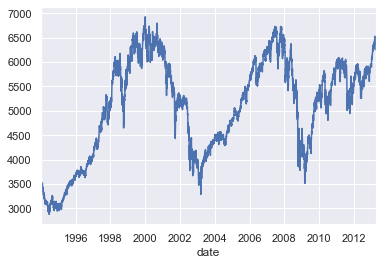

In [121]:
df_train['market_value'].plot()

    clearly not a stationary process

## Using Returns

    returns (r) refer to the percentage (%) change between the values of the current period and its previous period. 
    If r > 0 -> positive returns, if r < 0 -> negative returns

In [122]:
df_train['returns'] = df_train['market_value'].pct_change().mul(100)
df_train = df_train.iloc[1:]
df_train['returns'].head()

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_53997/3235782475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df_train['market_value'].pct_change().mul(100)


date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
Freq: B, Name: returns, dtype: float64

<AxesSubplot:xlabel='date'>

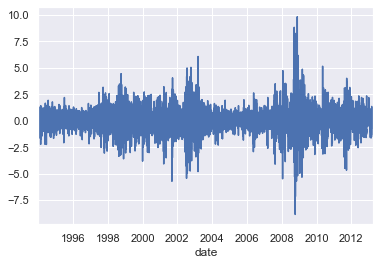

In [123]:
df_train['returns'].plot()

In [124]:
sts.adfuller(df_train['returns'])

(-12.770265719497397,
 7.798058336032513e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

    since the value of -15.14 is far more negative compared to the 1% threshold, this means that we can reject the null hypothesis that the returns is (weakly) stationary

## ACF and PACF for Returns

(-0.1, 0.1)

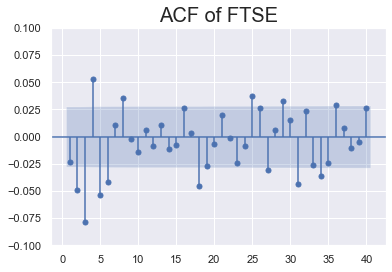

In [125]:
sgt.plot_acf(df_train['returns'], lags=40, zero=False)
plt.title('ACF of FTSE', size=20)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

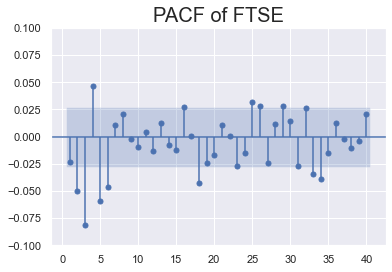

In [126]:
sgt.plot_pacf(df_train['returns'], lags=40, zero=False, method=('ols'))
plt.title('PACF of FTSE', size=20)
plt.ylim(-0.1, 0.1)

    one way to interpret this is that prices today often move in the opposite direction of the prices yesterday, reminiscent of cyclical changes. The longer the lag, the less its effects, thats why the diminishing effects

In [127]:
ret_model_ar1 = ARIMA(df_train['returns'], order=(1,0,0))
ret_result_ar1 = ret_model_ar1.fit()
print(ret_result_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Fri, 30 Dec 2022   AIC                          15865.497
Time:                        03:32:06   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.0

In [128]:
ret_model_ar2 = ARIMA(df_train['returns'], order=(2,0,0))
ret_result_ar2 = ret_model_ar2.fit()
print(ret_result_ar2.summary())
print(f'LLR Test for AR(2) vs AR(1) model: {LLR_test(ret_model_ar1, ret_model_ar2)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Fri, 30 Dec 2022   AIC                          15854.911
Time:                        03:32:08   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.0

In [129]:
ret_model_ar3 = ARIMA(df_train['returns'], order=(3,0,0))
ret_result_ar3 = ret_model_ar3.fit()
print(ret_result_ar3.summary())
print(f'LLR Test for AR(3) vs AR(3) model: {LLR_test(ret_model_ar2, ret_model_ar3)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Fri, 30 Dec 2022   AIC                          15823.477
Time:                        03:32:09   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.0

In [130]:
ret_model_ar4 = ARIMA(df_train['returns'], order=(4,0,0))
ret_result_ar4 = ret_model_ar4.fit()
print(ret_result_ar4.summary())
print(f'LLR Test for AR(4) vs AR(3) model: {LLR_test(ret_model_ar3, ret_model_ar4)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Fri, 30 Dec 2022   AIC                          15814.661
Time:                        03:32:11   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.0

In [131]:
ret_model_ar5 = ARIMA(df_train['returns'], order=(5,0,0))
ret_result_ar5 = ret_model_ar5.fit()
print(ret_result_ar5.summary())
print(f'LLR Test for AR(5) vs AR(4) model: {LLR_test(ret_model_ar4, ret_model_ar5)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7892.390
Date:                Fri, 30 Dec 2022   AIC                          15798.779
Time:                        03:32:12   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.0217      0.009     -2.396      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.826      0.0

In [132]:
ret_model_ar6 = ARIMA(df_train['returns'], order=(6,0,0))
ret_result_ar6 = ret_model_ar6.fit()
print(ret_result_ar6.summary())
print(f'LLR Test for AR(6) vs AR(5) model: {LLR_test(ret_model_ar5, ret_model_ar6)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Fri, 30 Dec 2022   AIC                          15789.890
Time:                        03:32:14   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.0

In [133]:
ret_model_ar7 = ARIMA(df_train['returns'], order=(7,0,0))
ret_result_ar7 = ret_model_ar7.fit()
print(ret_result_ar7.summary())
print(f'LLR Test for AR(7) vs AR(6) model: {LLR_test(ret_model_ar6, ret_model_ar7)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Fri, 30 Dec 2022   AIC                          15791.294
Time:                        03:32:16   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.0

## Normalising Values


    In the case of time series, when we normalise values, we map every value of the sample space to the percentage of the first value of the set

In [134]:
benchmark = df_train['market_value'].iloc[0]

In [136]:
df_train['norm'] = df_train['market_value'].div(benchmark).mul(100)

In [137]:
df_train.head()

,market_value,returns,norm
date,,,
1994-01-10,3440.58,-0.156704,100.000000
1994-01-11,3413.77,-0.779229,99.220771
1994-01-12,3372.02,-1.222988,98.007313
1994-01-13,3360.01,-0.356166,97.658244
1994-01-14,3400.56,1.206842,98.836824


<AxesSubplot:xlabel='date'>

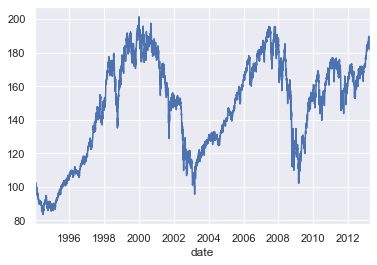

In [138]:
df_train['norm'].plot()

    need to use the ADF test to check if the time series data is stationary

In [139]:
sts.adfuller(df_train['norm'])

(-1.8928710132672324,
 0.3354222074330083,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

## Normalising Returns

In [147]:
ret_benchmark = df_train['returns'].iloc[0]
print(ret_benchmark)

-0.1567043337454055


In [148]:
df_train['norm_ret'] = df_train['returns'].div(ret_benchmark).mul(100)

In [149]:
df_train.head()

,market_value,returns,norm,norm_ret
date,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000
1994-01-11,3413.77,-0.779229,99.220771,497.260711
1994-01-12,3372.02,-1.222988,98.007313,780.443046
1994-01-13,3360.01,-0.356166,97.658244,227.285567
1994-01-14,3400.56,1.206842,98.836824,-770.139292


<AxesSubplot:xlabel='date'>

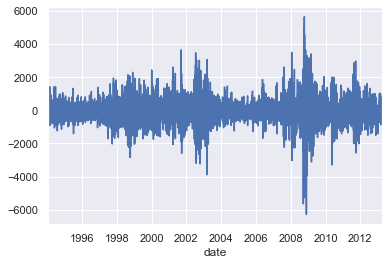

In [150]:
df_train['norm_ret'].plot()

In [152]:
sts.adfuller(df_train['norm_ret'])

(-12.770265719497353,
 7.798058336034075e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

## Normalised Returns

(-0.1, 0.1)

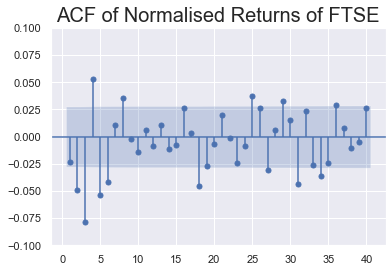

In [160]:
sgt.plot_acf(df_train['norm_ret'], lags=40, zero=False)
plt.title("ACF of Normalised Returns of FTSE", size=20)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

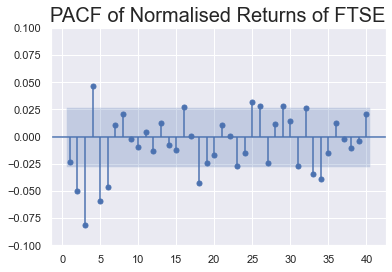

In [161]:
sgt.plot_pacf(df_train['norm_ret'], lags=40, zero=False, method='ols')
plt.title("PACF of Normalised Returns of FTSE", size=20)
plt.ylim(-0.1, 0.1)

In [170]:
norm_ret_model_ar1 = ARIMA(df_train['norm_ret'], order=(1,0,0))
norm_ret_model_ar1_results = norm_ret_model_ar1.fit()
print(norm_ret_model_ar1_results.summary())

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.743
Date:                Fri, 30 Dec 2022   AIC                          80709.487
Time:                        03:49:41   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.960    100.071      0.0

In [171]:
norm_ret_model_ar2 = ARIMA(df_train['norm_ret'], order=(2,0,0))
norm_ret_model_ar2_results = norm_ret_model_ar2.fit()
print(norm_ret_model_ar2_results.summary())
print(f'LLR Test for normalise returns AR(2) vs AR(1) model: {LLR_test(norm_ret_model_ar1, norm_ret_model_ar2)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.450
Date:                Fri, 30 Dec 2022   AIC                          80698.901
Time:                        03:49:46   BIC                          80724.986
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.050     -1.191      0.234     -31.671       7.725
ar.L1         -0.0242      0.009     -2.797      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.368      0.0

In [172]:
norm_ret_model_ar3 = ARIMA(df_train['norm_ret'], order=(3,0,0))
norm_ret_model_ar3_results = norm_ret_model_ar3.fit()
print(norm_ret_model_ar3_results.summary())
print(f'LLR Test for normalise returns AR(3) vs AR(2) model: {LLR_test(norm_ret_model_ar2, norm_ret_model_ar3)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -40328.733
Date:                Fri, 30 Dec 2022   AIC                          80667.466
Time:                        03:49:52   BIC                          80700.072
Sample:                    01-10-1994   HQIC                         80678.892
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.474     -1.264      0.206     -30.543       6.597
ar.L1         -0.0282      0.009     -3.193      0.001      -0.046      -0.011
ar.L2         -0.0520      0.008     -6.678      0.0

In [173]:
norm_ret_model_ar4 = ARIMA(df_train['norm_ret'], order=(4,0,0))
norm_ret_model_ar4_results = norm_ret_model_ar4.fit()
print(norm_ret_model_ar4_results.summary())
print(f'LLR Test for normalise returns AR(4) vs AR(3) model: {LLR_test(norm_ret_model_ar3, norm_ret_model_ar4)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -40323.325
Date:                Fri, 30 Dec 2022   AIC                          80658.650
Time:                        03:49:58   BIC                          80697.777
Sample:                    01-10-1994   HQIC                         80672.361
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.957     -1.202      0.229     -31.489       7.543
ar.L1         -0.0245      0.009     -2.769      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.325      0.0

In [174]:
norm_ret_model_ar5 = ARIMA(df_train['norm_ret'], order=(5,0,0))
norm_ret_model_ar5_results = norm_ret_model_ar5.fit()
print(norm_ret_model_ar5_results.summary())
print(f'LLR Test for normalise returns AR(5) vs AR(4) model: {LLR_test(norm_ret_model_ar4, norm_ret_model_ar5)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -40314.385
Date:                Fri, 30 Dec 2022   AIC                          80642.769
Time:                        03:50:02   BIC                          80688.418
Sample:                    01-10-1994   HQIC                         80658.765
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.468     -1.265      0.206     -30.531       6.585
ar.L1         -0.0217      0.009     -2.395      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.823      0.0

In [168]:
norm_ret_model_ar6 = ARIMA(df['norm_ret'], order=(6,0,0))
norm_ret_model_ar6_results = norm_ret_model_ar6.fit()
print(norm_ret_model_ar6_results.summary())
print(f'LLR Test for normalise returns AR(6) vs AR(5) model: {LLR_test(norm_ret_model_ar5, norm_ret_model_ar6)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6277
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -40308.940
Date:                Fri, 30 Dec 2022   AIC                          80633.880
Time:                        03:47:19   BIC                          80687.837
Sample:                    01-07-1994   HQIC                         80652.575
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.123     -1.312      0.189     -29.854       5.908
ar.L1         -0.0245      0.009     -2.639      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.501      0.0

In [176]:
norm_ret_model_ar7 = ARIMA(df_train['norm_ret'], order=(7,0,0))
norm_ret_model_ar7_results = norm_ret_model_ar7.fit()
print(norm_ret_model_ar7_results.summary())
print(f'LLR Test for normalise returns AR(7) vs AR(6) model: {LLR_test(norm_ret_model_ar6, norm_ret_model_ar7)}')

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40308.642
Date:                Fri, 30 Dec 2022   AIC                          80635.285
Time:                        03:50:14   BIC                          80693.975
Sample:                    01-10-1994   HQIC                         80655.851
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.262     -1.293      0.196     -30.126       6.179
ar.L1         -0.0240      0.009     -2.577      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.370      0.0

## Analysing the Residuals

In [183]:
df_train['res_price'] = result_ar7.resid
print(df_train['res_price'].mean())
print(df_train['res_price'].var())

0.6794634951404875
3468.0035994579926


<AxesSubplot:xlabel='date'>

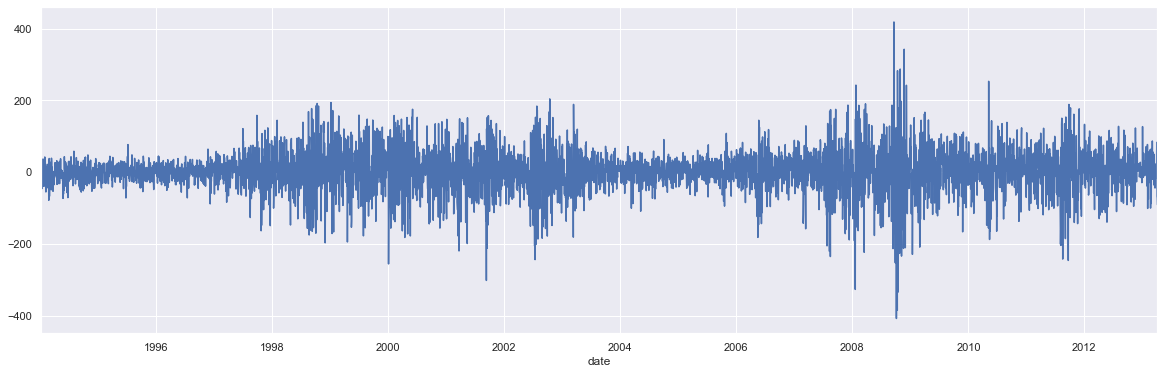

In [188]:
plt.figure(figsize=(20, 6))
df_train['res_price'].plot()

In [184]:
sts.adfuller(df_train['res_price'])

(-70.79902033009859,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.16404316962)

    This suggests that the residuals of this model is stationary

(-0.1, 0.1)

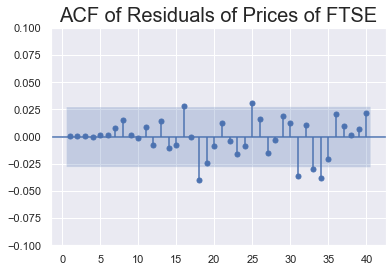

In [186]:
sgt.plot_acf(df_train['res_price'], lags=40, zero=False)
plt.title("ACF of Residuals of Prices of FTSE", size=20)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

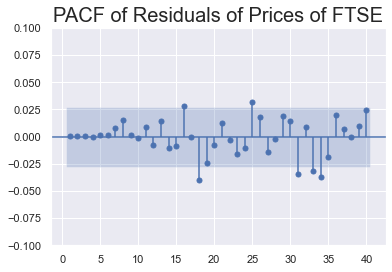

In [187]:
sgt.plot_pacf(df_train['res_price'], lags=40, zero=False, method=('ols'))
plt.title("PACF of Residuals of Prices of FTSE", size=20)
plt.ylim(-0.1, 0.1)

In [189]:
df_train['res_returns'] = ret_result_ar6.resid
print(df_train['res_returns'].mean())
print(df_train['res_returns'].var())

-4.853042308660194e-05
1.3559802128715204


Text(0.5, 1.0, 'Plot of residuals arising after modelling returns using AR(6) model')

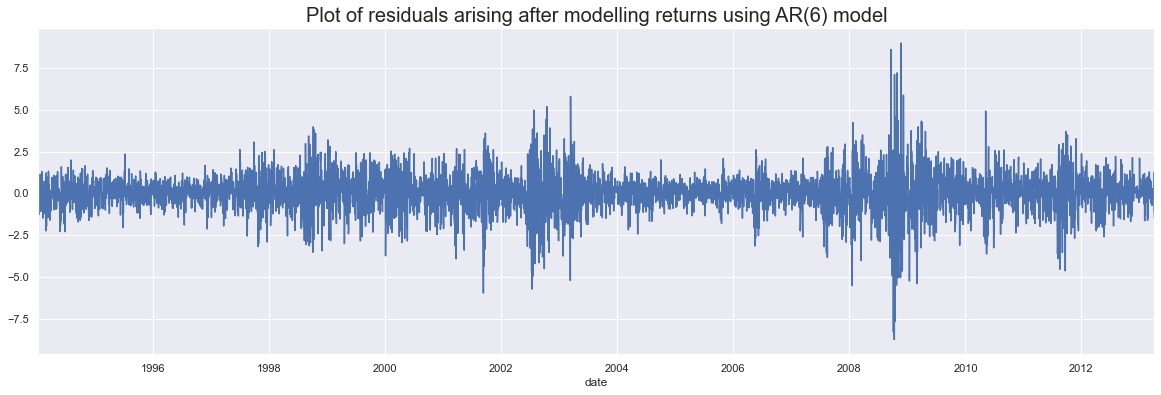

In [193]:
plt.figure(figsize=(20, 6))
df_train['res_returns'].plot()
plt.title("Plot of residuals arising after modelling returns using AR(6) model", size=20)

In [194]:
sts.adfuller(df_train['res_returns'])

(-70.78411835948526,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.57080733295)

(-0.05, 0.05)

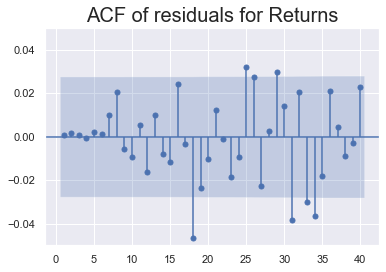

In [198]:
sgt.plot_acf(df_train['res_returns'], lags=40, zero=False)
plt.title("ACF of residuals for Returns", size=20)
plt.ylim(-0.05, 0.05)

(-0.05, 0.05)

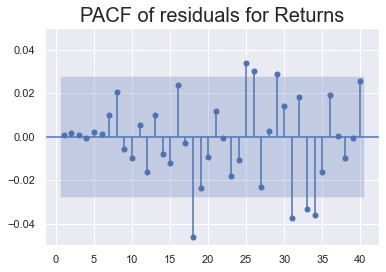

In [199]:
sgt.plot_pacf(df_train['res_returns'], lags=40, zero=False, method='ols')
plt.title("PACF of residuals for Returns", size=20)
plt.ylim(-0.05, 0.05)

     Self correcting models. The more errors we examine, the more adapted our model is to handle unforeseen models